# Local Sums



## Local Sums in arbitrary categories

We defined local sums in arbitrary categories. 
The requirement we have is that addition distributes over composition.
First we define some objects and arrows:

In [1]:
from discopy.cat import LocalSum, Ob, Box, Arrow
from typing import List, Callable

x, y, z = Ob('x'), Ob('y'), Ob('z')
f = Box('f', x, y)
g = Box('g', x, y)
h = Box('h', y, z)


We can add boxes as follows and then compose them on both sides:

In [2]:
fg = LocalSum([f, g]) 
print("This is the sum:", fg)
k = fg >> h
print("With composition from the right:", k)
l= Box("h'", z, x) >> fg
print("With composition from the left:", l)

This is the sum:  ((f) + (g)) 
With composition from the right:  ((f) + (g))  >> h
With composition from the left: h' >>  ((f) + (g)) 


The addition does distribute over composition. You can distribute to the left and to the right.
This implementation is neither memory efficient nor very nice to look at.
But it seems to work for now.

In [3]:
from discopy.localsum_rewriting import distribute_composition_cat

print(distribute_composition_cat(l, 1, 0))
print(distribute_composition_cat(k, 0, 1))


 ((h' >> f) + (h' >> g)) 
 ((f >> h) + (g >> h)) 


This also works for larger arrows, where we do not want to distribute the entire way and in both directions:

In [4]:
diag = Box("a", x, y) >> Box("b", y, x) >> LocalSum([Box("c", x, z), Box("d", x, z)]) >> Box("e", z, y)>> Box("f", y, y)>> Box("g", y, x)
print(diag)
print(distribute_composition_cat(diag, 2, 1))
print(distribute_composition_cat(diag, 2, 4))

a >> b >>  ((c) + (d))  >> e >> f >> g
a >>  ((b >> c) + (b >> d))  >> e >> f >> g
a >> b >>  ((c >> e >> f) + (d >> e >> f))  >> g


Undoing distribution is not supported directly, since for this to work all terms of the sum need to have some part in common.
So we use this method for reverting the distribution. 

In [5]:
# TODO: actually build the thing

## Local Sums in monoidal categories

For categories with a monoidal structure the addition will distribute over the monoidal product iff the category admits arbitrary biproducts.
We basically have that for arrows $A,B,C$ we get $A \otimes (B + C) = (A \otimes B ) + (A \otimes C)$

If this is given one may use the following function to pull parts of the diagram in and out of a sum.



In [6]:
from discopy.monoidal import LocalSum, Ob, Box, Diagram, Ty, Id

x, y, z = Ty('x'), Ty('y'), Ty('z')
f = Box('f', x, y)
g = Box('g', x, y)
h = Box('h', y, z)

In [10]:
from discopy import rewriting
from discopy.drawing import diagram2nx
import networkx as nx

from discopy.localsum_rewriting import distribute_tensor

diag = LocalSum([f, g]) @ h
print(diag)
print(diag.layers)
print(diag.boxes)
print(diag.cod)
diag = f @ (diag >> Box("t", y @ z, x) >> f) @ g
diag = diag.normal_form()
print(diag)
diag.draw()
diag = distribute_tensor(diag, 1, 2)

diag.draw()


ImportError: cannot import name 'distribute_tensor' from 'discopy.localsum_rewriting' (/home/muuss/Data/University/Masterarbeit/discopy/discopy/localsum_rewriting.py)

Unfortunatly as of now drawing does not work correctly, as you may have noticed above and can again see below:

In [8]:
diag = Box("a", x, y) >> Box("b", y, x) >> LocalSum([Box("c", x, z), Box("d", x, z)]) >> Box("e", z, y)>> Box("f", y, y)>> Box("g", y, x)
print(diag)
distribute_composition_cat(diag, 2, 1, arrow_construction=lambda dom,cod,boxes: Diagram(dom, cod,boxes, [0]*len(boxes))).draw()

a >> b >>  ((c) + (d))  >> e >> f >> g


NameError: name 'distribute_composition_old' is not defined

f @ Id(y @ y @ x) >> Id(y) @ a @ Id(y @ x) >> Id(y) @  ((f) + (g))  @ Id(y @ x) >> Id(y @ y) @ h @ Id(x) >> Id(y) @ t @ Id(x) >> Id(y) @ f @ Id(x) >> Id(y @ y) @ g


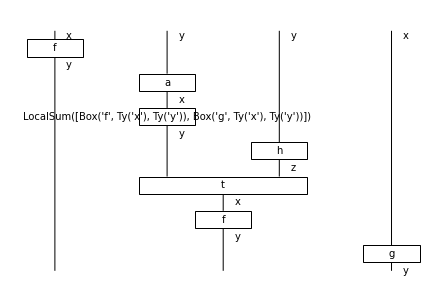

f @ Id(y @ y @ x) >> Id(y) @ a @ Id(y @ x) >> Id(y) @  ((f) + (g))  @ Id(y @ x) >> Id(y @ y) @ h @ Id(x) >> Id(y) @ t @ Id(x) >> Id(y) @ f @ Id(x) >> Id(y @ y) @ g


In [ ]:
from discopy.monoidal import LocalSum, Ob, Box, Diagram
def distribute_composition(arrow: Diagram, index_sum: int, distribute_to_index: int, arrow_construction=lambda dom,cod,boxes: Diagram(dom,cod,boxes), localsum_type=LocalSum) -> Arrow:
    """
    Distributes the sum at index_sum to the left with

    Parameters
    ----------
    arrow: Arrow
        The arrow to perform the operation on
    index_sum: int
        The index of the sum to distribute for
    distribute_to_index: int
        index of the box to distribute into, this needs to be adjacent
    arrow_construction: callable
        callable returning the arrow equivalent in the relevant category    

    Raises
    ------
      IndexError: The index of sum does not correspond to a box or distribute_to_index is not valid or the box is not adjacent
      TypeError: The box at index_sum does not have type sum
    """
    if len(arrow.boxes) <= index_sum or index_sum < 0:
        raise IndexError("index_sum to large or negative, no such box")
    if len(arrow.boxes) <= distribute_to_index or distribute_to_index < 0:
        raise IndexError("distribute_to_index to large or negative, no such box")
    if not isinstance(arrow.boxes[index_sum], LocalSum):
        raise TypeError(f"box at index {index_sum} is not a LocalSum" )

def check_if_composing_before(arrow: Diagram, index_before: int, index_after: int):
    if len(arrow.boxes) <= index_before or index_before < 0:
        raise IndexError("index_before to large or negative, no such box")
    if len(arrow.boxes) <= index_after or index_after < 0:
        raise IndexError("index_after to large or negative, no such box")
    print(arrow)

diag = (Box("a", y, x) >> LocalSum([f, g])) @ h
diag = f @ (diag >> Box("t", y @ z, x) >> f) @ g
diag = diag.normal_form()
print(diag)
diag.draw()

check_if_composing_before(diag, 1, 2)

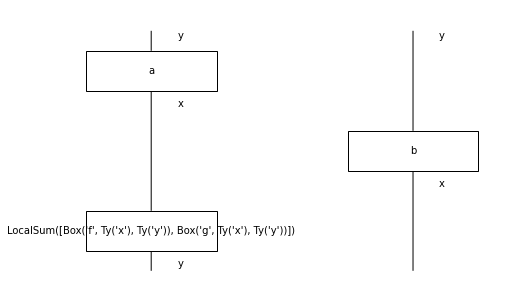

Arrow(dom=Ty('y', 'y'), cod=Ty('y', 'x'), boxes=[Layer(Ty(), Box('a', Ty('y'), Ty('x')), Ty('y')), Layer(Ty('x'), Box('b', Ty('y'), Ty('x')), Ty()), Layer(Ty(), LocalSum([Box('f', Ty('x'), Ty('y')), Box('g', Ty('x'), Ty('y'))]), Ty('x'))])

In [ ]:
diag = (Box("a", y, x) @ Box("b", y, x)) >> ( LocalSum([f, g]) @Id(x) )
diag.draw()
for x in diag.layers:
    print(x)